In [1]:
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
################## Polluted Days ######################

In [6]:
df1 = pd.read_csv("data/Parameters/pm2.5/2023-01-02.csv")
df2 = pd.read_csv("data/Parameters/pm2.5/2023-01-29.csv")
df3 = pd.read_csv("data/Parameters/pm2.5/2023-01-24.csv")

df1.x1 = df1.x1*60
df2.x1 = df2.x1*60
df3.x1 = df3.x1*60

In [7]:
def peak_val(data):
    # Remove pairs where x >= 90
    filtered_list = [[x, y] for x, y in data if x < 90]

    # print(filtered_list)
    data = filtered_list
    # Find the (x, y) pair with the maximum y value
    max_y_pair = max(data, key=lambda pair: pair[1])
    
    print(f"The (x, y) pair with the maximum y value is: {max_y_pair}")
    return max_y_pair

The (x, y) pair with the maximum y value is: [12.95303940498128, 2567.7376547724243]


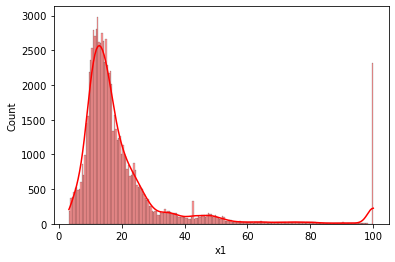

In [8]:
# Plot the probability density functions using kernel density estimates (KDE)
ax1 = sns.histplot(data=df1, x='x1',alpha = 0.4,  kde = True, color ="r", label='Most Polluted (02/01/2023)')
data_1 =  ax1.lines[0].get_xydata()
peak_1 = peak_val(data_1)[0]

The (x, y) pair with the maximum y value is: [15.225333326300218, 3534.3275939832333]


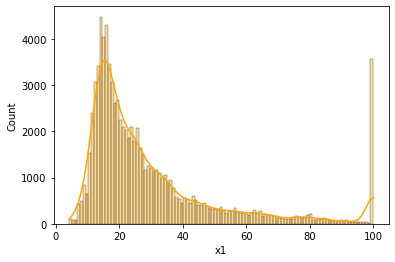

In [9]:
ax2 = sns.histplot(data=df2, x='x1', alpha = 0.4, kde = True, color ="orange", label='Intermediate Polluted (29/01/2023)')
data_2 = ax2.lines[0].get_xydata()
peak_2 = peak_val(data_2)[0]

The (x, y) pair with the maximum y value is: [18.691147348774727, 2619.1380251982087]


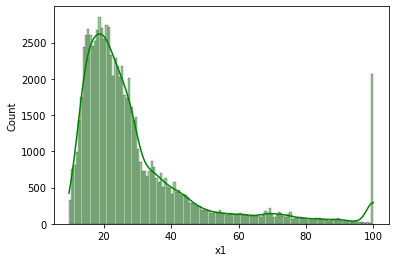

In [11]:
ax3 = sns.histplot(data=df3, x='x1', alpha = 0.4, kde = True,color ="g", label='Least Polluted (24/01/2023)')
data_3 = ax3.lines[0].get_xydata()
peak_3 = peak_val(data_3)[0]

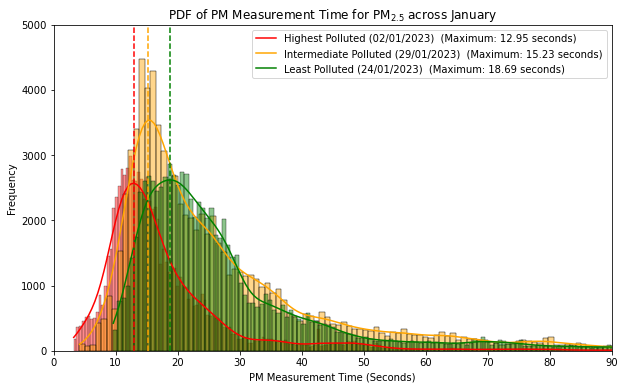

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='x1',alpha = 0.45,  kde = True, color ="r", label='Highest Polluted (02/01/2023)')
sns.histplot(data=df2, x='x1', alpha = 0.45, kde = True, color ="orange", label='Intermediate Polluted (29/01/2023)')
sns.histplot(data=df3, x='x1', alpha = 0.45, kde = True,color ="g", label='Least Polluted (24/01/2023)')



plt.xlim(0, 90)
plt.ylim(0, 5000)
plt.xlabel('PM Measurement Time (Seconds)')
plt.ylabel('Frequency')
plt.title('PDF of PM Measurement Time for PM$_{2.5}$ across January')
plt.legend()

plt.axvline(peak_1, color='red', linestyle='dashed',)
plt.axvline(peak_2, color='orange', linestyle='dashed')
plt.axvline(peak_3, color='green', linestyle='dashed')

legend_labels = ['Highest Polluted (02/01/2023)', 'Intermediate Polluted (29/01/2023)', 'Least Polluted (24/01/2023)']
for i, peak_value in enumerate([peak_1, peak_2, peak_3]):
    legend_labels[i] += f'  (Maximum: {round(peak_value, 2)} seconds)'

# Update legend with custom labels
plt.legend(labels=legend_labels)
plt.savefig(r"D:\UTD\UTDFall2023\Temporal_Variograms\firmware\plots\Polluted_Day_with_peak_times.png")
plt.show()
plt.show()